### k-means

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# location_info data
location = pd.read_csv(r"D:\HKU\Capstone\loaction_info.csv")
location = location.iloc[:,1:3]
location.describe()

,longitude,latitude
count,2022.000000,2022.000000
mean,116.661325,40.261496
std,0.100605,0.074095
min,116.453885,40.131752
25%,116.577040,40.209764
50%,116.678451,40.231752
75%,116.748253,40.314542
max,116.878645,40.495116


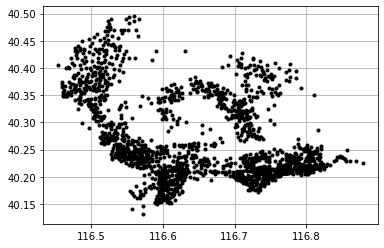

In [15]:
# scatter plot
plt.figure()
plt.grid(True)
plt.plot(location['longitude'],location['latitude'],'k.')
location = np.array(location)
location = location[0:-1]

D:\Anacoda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Text(0, 0.5, 'meandistortions')

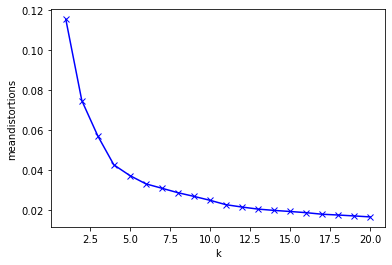

In [8]:
#mean values of distortion from k in range(1,10)
from sklearn.cluster import KMeans

#scipy euclidean distance
from scipy.spatial.distance import cdist
K=range(1,21)
meandistortions=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(location)
    meandistortions.append(sum(np.min(
            cdist(location,kmeans.cluster_centers_,
                 'euclidean'),axis=1))/location.shape[0])
plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('meandistortions')

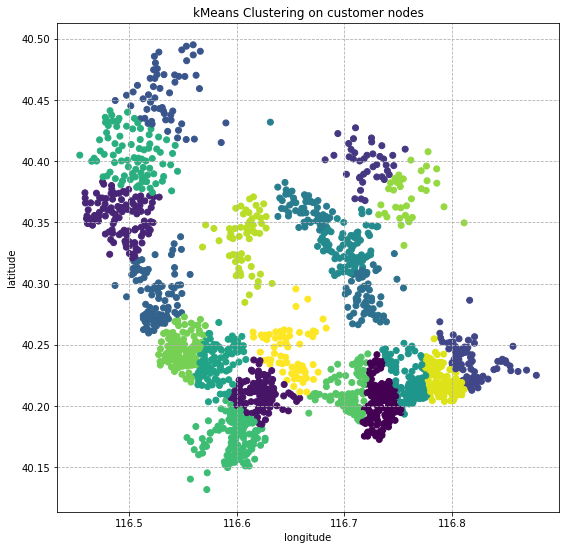

cluster_id
0.0     176
1.0     129
2.0     107
3.0      40
4.0      90
5.0      56
6.0      87
7.0      62
8.0      59
9.0      77
10.0    252
11.0     97
12.0     86
13.0    155
14.0    128
15.0    113
16.0     35
17.0     59
18.0    148
19.0     66
dtype: int64

In [9]:
#clustering k = 20 
y_pred = KMeans(n_clusters=20, random_state=170).fit_predict(location)

plt.figure(figsize=(9,9))

plt.scatter(location[:, 0], location[:, 1], c=y_pred)
plt.title("kMeans Clustering on customer nodes")
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid(linestyle = '--') 
plt.show()

#output
result = np.hstack((location,y_pred.reshape((len(y_pred),1))))
result = pd.DataFrame(result,columns=['longitude','latitude','cluster_id'])

output = pd.read_csv(r"D:\HKU\Capstone\loaction_info.csv")
output  = pd.concat([output.iloc[:,0:3], result['cluster_id']], axis=1)
output.to_csv("D:/HKU/Capstone/output.csv")

result.groupby('cluster_id').size()